In [49]:
import os
import pickle
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv",index_col=0)

In [51]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [52]:
#done label encoding in flight column
label_encoder = LabelEncoder()
df['flight'] = label_encoder.fit_transform(df['flight'])

In [53]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,1408,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,1387,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,1213,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,1559,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,1549,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [54]:
def data_to_one_hot(df):
    # get dummy variables for multiple columns
    dummy_cols = ['airline', 'departure_time','arrival_time','source_city','destination_city']
    df1_dummy = pd.get_dummies(df[dummy_cols])

    # concatenate original DataFrame with dummy variable DataFrame
    df1_concat = pd.concat([df.drop(dummy_cols, axis=1), df1_dummy], axis=1)
    
    # display result
    return df1_concat

In [55]:
def data_label_encoding(df):
    from sklearn.preprocessing import LabelEncoder

    # Create an instance of LabelEncoder
    label_encoder = LabelEncoder()

    # Specify the list of categorical columns to encode
    categorical_columns = ['airline', 'departure_time','arrival_time','source_city','destination_city']

    # Apply label encoding to each categorical column
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [56]:
def spilt_data(train_data,test_data):
    #create x and y where x are features for the model and y as target
    x_train = train_data.drop('price',axis=1)
    y_train = train_data['price']

    #for test data, create x and y where x are features for the model and y as target
    x_test = test_data.drop('price',axis=1)
    y_test = test_data['price']
    
    return x_train,y_train,x_test,y_test

In [57]:
def spilt_inti_x_y(data):
    
    #for test data, create x and y where x are features for the model and y as target
    x = test_data.drop('price',axis=1)
    y = test_data['price']
    return x,y

In [58]:
def divide_into_train_test(data,part):
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(data, test_size=part, random_state=123)
    return train_data,test_data

In [59]:
def model_random_forest(x_train,y_train,x_test,y_test):

    import time

    start_time = time.time()
    
    #model 
    regr = RandomForestRegressor(random_state=123)

    #training model input as x_train and y_tarin
    regr.fit(x_train,y_train)

    #model is creted show give x test data as input and retuen predictd data 
    predictions = regr.predict(x_test)
   
    '''
     #MAE
    print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

    #MSE
    print('MSE:-',metrics.mean_squared_error(y_test,predictions))

    #RMSE
    print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

    #r2
    print("r2",r2_score(y_test, predictions))
    '''
    
    # evaluation
    data = [
        ["MAE",metrics.mean_absolute_error(y_test,predictions)],
        ["MSE",metrics.mean_squared_error(y_test,predictions)],
        ["RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions))],
        ["r2",r2_score(y_test, predictions)],
        ["explained_variance_score",metrics.explained_variance_score(y_test, predictions)],
        ["max_error",metrics.max_error(y_test, predictions)],
        ["mean_absolute_percentage_error",metrics.mean_absolute_percentage_error(y_test, predictions)],
        ["mean_squared_log_error",metrics.mean_squared_log_error(y_test, predictions)],
        ["mean_squared_log_error(squared=False)",metrics.mean_squared_log_error(y_test, predictions, squared=False)]
    ]

    # Define the headers
    headers = ["metrics", "value"]

    # Display the data in a tabular format
    table = tabulate(data, headers, tablefmt="grid")
    print(table)
    
    # Code or function to measure execution time
    end_time = time.time()
    execution_time = end_time - start_time
    print("Execution time:", execution_time, "seconds")
    
    return regr,predictions

In [60]:
def model_into_pickle(model, filename):

    # Create the directory if it doesn't exist
    directory = os.path.dirname(filename)
    if not os.path.exists(directory):
        os.makedirs(directory)

    # Save the model to the specified filename
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [61]:
def predict_with_model(data, model_path):
    # Load the model from the pickle file
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Make predictions on the new data
    predictions = model.predict(data)
    
    return predictions

In [62]:
def testing_new_data(data,filename_1,filename_2,filename_3):
    
    #convert into one hot and label sncoding 
    data_1 = data_to_one_hot(data)
    data_2 = data_label_encoding(data)
    
    # Make predictions on the new data
    predictions_1 = predict_with_model(data_1, filename_1)
    predictions_2 = predict_with_model(data_2, filename_2)
    
    # Stack the predictions horizontally
    stacked_predictions = np.column_stack((predictions_1, predictions_2))

    # Combine original features with stacked predictions
    X_stacked = np.column_stack((data_1,data_2,stacked_predictions))
    
    final_prediction = predict_with_model(X_stacked, filename_3)
    
    return predictions_1,predictions_2,final_prediction

In [63]:
#final script

#split data into two part where one is train main part and econd main test part
#train_data,test_data = divide_into_train_test(df,0.15)

#devide train data into data 1 and data 2 for one hot and klabel encoding
data_1 = data_to_one_hot(df)
data_2 = data_label_encoding(df)

#divide data1 and data 2 into two part train and test
train_data_1,test_data_1 = divide_into_train_test(data_1,0.30)
train_data_2,test_data_2 = divide_into_train_test(data_2,0.30)

#divide train test into fetures and target
X_train_1,y_train_1,X_test_1,y_test_1=spilt_data(train_data_1,test_data_1)
X_train_2,y_train_2,X_test_2,y_test_2=spilt_data(train_data_2,test_data_2)

#model train part 
print('-------------------------------model:1(one hot encoding)-------------------------------------')
print( )
model_1,predictions_1 = model_random_forest(X_train_1,y_train_1,X_test_1,y_test_1)
print( )
print('-------------------------------model:2(label encoding)---------------------------------------')
print( )
model_2,predictions_2 = model_random_forest(X_train_2,y_train_2,X_test_2,y_test_2)
print( )

#dump in pickle file 
filename_1 = '/home/growlt199/Downloads/manufacturing_project/model_training/model_stacking/model_1_random_forest_regression.pkl'
filename_2 = '/home/growlt199/Downloads/manufacturing_project/model_training/model_stacking/model_2_random_forest_regression.pkl'

model_into_pickle(model_1,filename_1)
model_into_pickle(model_2,filename_2)


-------------------------------model:1(one hot encoding)-------------------------------------

+---------------------------------------+-----------------+
| metrics                               |           value |
+=======================================+=================+
| MAE                                   |   843.009       |
+---------------------------------------+-----------------+
| MSE                                   |     4.76892e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2183.79        |
+---------------------------------------+-----------------+
| r2                                    |     0.990572    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990574    |
+---------------------------------------+-----------------+
| max_error                             | 43954.1         |
+---------------------------------------+-----------------+
| mea

# model stacking model 3 is linear model to predict final prediction

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have the predictions from model 1 and model 2 as arrays: y_model1, y_model2
# You can replace y_model1 and y_model2 with the actual prediction arrays from your models

# Combine the predictions into a feature matrix X
X = np.column_stack((model_1.predict(X_test_1), model_2.predict(X_test_2)))

# Prepare the target variable
# Assuming you have the actual prices as an array: y_actual
# You can replace y_actual with the actual prices from your dataset
y_actual = np.array(y_test_1)

# Fit a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y_actual)

# Get the coefficients for the equation
coefficients = regression_model.coef_

# Print the coefficients
print("Coefficient for model 1:", coefficients[0])
print("Coefficient for model 2:", coefficients[1])


Coefficient for model 1: 0.7357045010006831
Coefficient for model 2: 0.26276691960277654


In [32]:
predictions = coefficients[0] * model_1.predict(X_test_1) + coefficients[1] * model_2.predict(X_test_2) 
y_test=y_test_1

data = [
        ["MAE",metrics.mean_absolute_error(y_test,predictions)],
        ["MSE",metrics.mean_squared_error(y_test,predictions)],
        ["RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions))],
        ["r2",r2_score(y_test, predictions)],
        ["explained_variance_score",metrics.explained_variance_score(y_test, predictions)],
        ["max_error",metrics.max_error(y_test, predictions)],
        ["mean_absolute_percentage_error",metrics.mean_absolute_percentage_error(y_test, predictions)],
        ["mean_squared_log_error",metrics.mean_squared_log_error(y_test, predictions)],
        ["mean_squared_log_error(squared=False)",metrics.mean_squared_log_error(y_test, predictions, squared=False)]
    ]
1
# Define the headers
headers = ["metrics", "value"]

# Display the data in a tabular format
table = tabulate(data, headers, tablefmt="grid")
print(table)

+---------------------------------------+-----------------+
| metrics                               |           value |
+=======================================+=================+
| MAE                                   |   846.014       |
+---------------------------------------+-----------------+
| MSE                                   |     4.73752e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2176.58        |
+---------------------------------------+-----------------+
| r2                                    |     0.990635    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990635    |
+---------------------------------------+-----------------+
| max_error                             | 43424.8         |
+---------------------------------------+-----------------+
| mean_absolute_percentage_error        |     0.058225    |
+---------------------------------------

# method 1:- where use w*model1+(1-w)*model2

In [65]:
from tqdm import tqdm_notebook
# Define the weight range and interval
weight_range = np.arange(0, 1.01, 0.01)

m1_best_weight = 0
m1_best_accuracy = 10000000

# Iterate over the weight values
for weight in tqdm_notebook(weight_range):
    # Combine the predictions of the two models using the weight
    y_pred_combined = weight *model_1.predict(X_test_1) + (1 - weight) * model_2.predict(X_test_2)
    
    # Calculate the mean squared error
    accuracy = metrics.mean_absolute_error(y_test_1, y_pred_combined)
    
    # Check if the current weight gives better accuracy than the previous best accuracy
    if accuracy < m1_best_accuracy or m1_best_accuracy == 0:
        m1_best_accuracy = accuracy
        m1_best_weight = weight

# Print the best weight and corresponding accuracy
print("Best Weight:", m1_best_weight)
print("Best Accuracy:", m1_best_accuracy)

/tmp/ipykernel_28366/2433650397.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight in tqdm_notebook(weight_range):


  0%|          | 0/101 [00:00<?, ?it/s]

Best Weight: 0.88
Best Accuracy: 842.551224490998


In [113]:
predictions = m1_best_weight * model_1.predict(X_test_1) + (1 - m1_best_weight) * model_2.predict(X_test_2) 
y_test=y_test_1

In [114]:
m1_best_weight

0.88

In [115]:
data = [
        ["MAE",metrics.mean_absolute_error(y_test,predictions)],
        ["MSE",metrics.mean_squared_error(y_test,predictions)],
        ["RMSE",np.sqrt(metrics.mean_squared_error(y_test,predictions))],
        ["r2",r2_score(y_test, predictions)],
        ["explained_variance_score",metrics.explained_variance_score(y_test, predictions)],
        ["max_error",metrics.max_error(y_test, predictions)],
        ["mean_absolute_percentage_error",metrics.mean_absolute_percentage_error(y_test, predictions)],
        ["mean_squared_log_error",metrics.mean_squared_log_error(y_test, predictions)],
        ["mean_squared_log_error(squared=False)",metrics.mean_squared_log_error(y_test, predictions, squared=False)]
    ]

# Define the headers
headers = ["metrics", "value"]

# Display the data in a tabular format
table = tabulate(data, headers, tablefmt="grid")
print(table)

+---------------------------------------+-----------------+
| metrics                               |           value |
+=======================================+=================+
| MAE                                   |   842.551       |
+---------------------------------------+-----------------+
| MSE                                   |     4.74801e+06 |
+---------------------------------------+-----------------+
| RMSE                                  |  2178.99        |
+---------------------------------------+-----------------+
| r2                                    |     0.990614    |
+---------------------------------------+-----------------+
| explained_variance_score              |     0.990615    |
+---------------------------------------+-----------------+
| max_error                             | 43751.4         |
+---------------------------------------+-----------------+
| mean_absolute_percentage_error        |     0.0584203   |
+---------------------------------------

# method 2 : (w1*m1+w2*m2)/(w1+w2)

In [ ]:
# ABHISHEK 

In [20]:
import multiprocessing
from tqdm import tqdm_notebook

In [24]:
def mp_fun(weight2):
    
    # Combine the predictions of the two models using the weight
    y_pred_combined = (weight1 * model_1.predict(X_test_1) + weight2 * model_2.predict(X_test_2)) / (weight1 + weight2)

    # Calculate the mean squared error
    accuracy = metrics.mean_absolute_error(y_test_1, y_pred_combined)
    
    return [weight1, weight2, accuracy]

#     # Check if the current weight gives better accuracy than the previous best accuracy
#     if accuracy < m2_best_accuracy or m2_best_accuracy == 0:
#         print(m2_best_accuracy)
#         m2_best_accuracy = accuracy
#         m2_best_weight = weight

In [29]:
# Define the weight range and interval
weight_range = np.arange(0.50, 1.01, 0.02)

# m2_best_weight = 0
# m2_best_accuracy = 10000000000

all_ = []

# Iterate over the weight values
for weight1 in tqdm_notebook(weight_range[:1]):
    
    pool = multiprocessing.Pool()
    data = pool.map(mp_fun, weight_range)
    
    all_ = all_ + data
    
    pool.close()
    pool.join()

# Print the best weight and corresponding accuracy
# print("Best Weight:", m2_best_weight)
# print("Best Accuracy:", m2_best_accuracy)

/tmp/ipykernel_28366/1093762721.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight1 in tqdm_notebook(weight_range[:1]):


  0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
all_

[[0.5, 0.5, 846.2006521605778],
 [0.5, 0.52, 846.3924965035554],
 [0.5, 0.54, 846.5803935761799],
 [0.5, 0.56, 846.7643304890181],
 [0.5, 0.5800000000000001, 846.9458732122677],
 [0.5, 0.6000000000000001, 847.1273106600551],
 [0.5, 0.6200000000000001, 847.305779051105],
 [0.5, 0.6400000000000001, 847.4823289896418],
 [0.5, 0.6600000000000001, 847.6573714043506],
 [0.5, 0.6800000000000002, 847.8282353249017],
 [0.5, 0.7000000000000002, 847.9975010592755],
 [0.5, 0.7200000000000002, 848.1638536041633],
 [0.5, 0.7400000000000002, 848.3269255504886],
 [0.5, 0.7600000000000002, 848.4861269176344],
 [0.5, 0.7800000000000002, 848.643403859604],
 [0.5, 0.8000000000000003, 848.7987152725675],
 [0.5, 0.8200000000000003, 848.950399153354],
 [0.5, 0.8400000000000003, 849.0989537659053],
 [0.5, 0.8600000000000003, 849.2448282158678],
 [0.5, 0.8800000000000003, 849.3885196016178],
 [0.5, 0.9000000000000004, 849.5298644871148],
 [0.5, 0.9200000000000004, 849.668026490627],
 [0.5, 0.9400000000000004, 

In [26]:
all_

[[0.01, 0.01, 846.200652160578],
 [0.01, 0.02, 850.1950566543891],
 [0.01, 0.03, 852.7147194219272],
 [0.01, 0.04, 854.402259445816],
 [0.01, 0.05, 855.5912617808957],
 [0.01, 0.060000000000000005, 856.4733935020489],
 [0.01, 0.06999999999999999, 857.1544407637105],
 [0.01, 0.08, 857.6956105399003],
 [0.01, 0.09, 858.1350096030521],
 [0.01, 0.09999999999999999, 858.5006791048627],
 [0.01, 0.11, 858.8097591277653],
 [0.01, 0.12, 859.0745216632242],
 [0.01, 0.13, 859.3032179917336],
 [0.01, 0.14, 859.5029202153506],
 [0.01, 0.15000000000000002, 859.678651726367],
 [0.01, 0.16, 859.8359931663488],
 [0.01, 0.17, 859.9768019806298],
 [0.01, 0.18000000000000002, 860.1036275797971],
 [0.01, 0.19, 860.218152670158],
 [0.01, 0.2, 860.322097545484],
 [0.01, 0.21000000000000002, 860.4170118337138],
 [0.01, 0.22, 860.5040364041938],
 [0.01, 0.23, 860.5839660445212],
 [0.01, 0.24000000000000002, 860.6576311444074],
 [0.01, 0.25, 860.7258265256037],
 [0.01, 0.26, 860.789178500868],
 [0.01, 0.27, 860

In [28]:
all_

[[0.02, 0.02, 846.200652160578],
 [0.02, 0.03, 848.4068962793431],
 [0.02, 0.039999999999999994, 850.1950566543885],
 [0.02, 0.049999999999999996, 851.5975971010996],
 [0.02, 0.06, 852.7147194219272],
 [0.02, 0.06999999999999999, 853.6374134893528],
 [0.02, 0.07999999999999999, 854.402259445816],
 [0.02, 0.09, 855.0451882932624],
 [0.02, 0.09999999999999999, 855.5912617808957],
 [0.02, 0.10999999999999999, 856.0631717826278],
 [0.02, 0.11999999999999998, 856.4733935020489],
 [0.02, 0.12999999999999998, 856.8335029511371],
 [0.02, 0.13999999999999999, 857.1544407637105],
 [0.02, 0.14999999999999997, 857.4400737537599],
 [0.02, 0.15999999999999998, 857.6956105399003],
 [0.02, 0.16999999999999996, 857.9257263749658],
 [0.02, 0.17999999999999997, 858.1350096030521],
 [0.02, 0.18999999999999997, 858.3258339822471],
 [0.02, 0.19999999999999996, 858.5006791048629],
 [0.02, 0.20999999999999996, 858.6614662298895],
 [0.02, 0.21999999999999995, 858.8097591277651],
 [0.02, 0.22999999999999995, 85

In [120]:
# Define the weight range and interval
weight_range = np.arange(0.01, 1.01, 0.01)

m2_best_weight = 0
m2_best_accuracy = 0

# Iterate over the weight values
for weight1 in tqdm_notebook(weight_range):
    for weight2 in tqdm_notebook(weight_range):
        # Combine the predictions of the two models using the weight
        y_pred_combined = (weight1 * model_1.predict(X_test_1) + weight2 * model_1.predict(X_test_1)) / (weight1 + weight2)

        # Calculate the mean squared error
        accuracy = metrics.mean_absolute_error(y_test_1, y_pred_combined)

        # Check if the current weight gives better accuracy than the previous best accuracy
        if accuracy < m2_best_accuracy or m2_best_accuracy == 0:
            m2_best_accuracy = accuracy
            m2_best_weight = weight

# Print the best weight and corresponding accuracy
print("Best Weight:", m2_best_weight)
print("Best Accuracy:", m2_best_accuracy)

/tmp/ipykernel_18000/551013702.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight1 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

/tmp/ipykernel_18000/551013702.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for weight2 in tqdm_notebook(weight_range):


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

# testing prediction vs actual price

In [66]:
actual_price_1 = y_test_1.copy()
model_1_pre = model_1.predict(X_test_1)
model_2_pre = model_2.predict(X_test_2)
weightage_pre = m1_best_weight * model_1.predict(X_test_1) + (1 - m1_best_weight) * model_2.predict(X_test_2) 

In [67]:
y_test_1.shape

(89649,)

In [68]:
actual_price = actual_price_1.to_frame(name='actual_price')
actual_price = actual_price.reset_index(drop=True)
actual_price.head()

,actual_price
0,38554
1,6312
2,15606
3,15537
4,5960


In [69]:
# Convert arrays to dataframes
array1_df = pd.DataFrame({'model_1_pre': model_1_pre})
array2_df = pd.DataFrame({'model_2_pre': model_2_pre})
array3_df = pd.DataFrame({'weightage_pre': weightage_pre})

# Merge the dataframe and arrays horizontally (column-wise) without including indices
weightage_results = pd.concat([actual_price, array1_df, array2_df, array3_df], axis=1)

# Save the merged dataframe to a CSV file
weightage_results.to_csv('weightage_results.csv', index=False)


In [70]:
weightage_results = pd.read_csv('weightage_results.csv')

In [71]:
weightage_results.head(10)

,actual_price,model_1_pre,model_2_pre,weightage_pre
0,38554,38554.00,39420.93,38658.0316
1,6312,5253.57,5720.44,5309.5944
2,15606,14951.24,15000.94,14957.2040
3,15537,10947.51,11547.52,11019.5112
4,5960,5985.20,5999.44,5986.9088
5,44280,44280.00,44280.00,44280.0000
6,6578,6585.29,6587.72,6585.5816
7,12118,7444.12,7674.76,7471.7968
8,6067,6067.00,6067.00,6067.0000
9,5178,5011.01,5444.89,5063.0756


In [72]:
weightage_results.shape

(89649, 4)

# add model error columns 

In [73]:
weightage_results['model_1_error']=abs(weightage_results['actual_price']-weightage_results['model_1_pre'])
weightage_results['model_2_error']=abs(weightage_results['actual_price']-weightage_results['model_2_pre'])
weightage_results['weightage_error']=abs(weightage_results['actual_price']-weightage_results['weightage_pre'])

In [74]:
weightage_results.head(20)

,actual_price,model_1_pre,model_2_pre,weightage_pre,model_1_error,model_2_error,weightage_error
0,38554,38554.00,39420.93,38658.0316,0.00,866.93,104.0316
1,6312,5253.57,5720.44,5309.5944,1058.43,591.56,1002.4056
2,15606,14951.24,15000.94,14957.2040,654.76,605.06,648.7960
3,15537,10947.51,11547.52,11019.5112,4589.49,3989.48,4517.4888
4,5960,5985.20,5999.44,5986.9088,25.20,39.44,26.9088
5,44280,44280.00,44280.00,44280.0000,0.00,0.00,0.0000
6,6578,6585.29,6587.72,6585.5816,7.29,9.72,7.5816
7,12118,7444.12,7674.76,7471.7968,4673.88,4443.24,4646.2032
8,6067,6067.00,6067.00,6067.0000,0.00,0.00,0.0000
9,5178,5011.01,5444.89,5063.0756,166.99,266.89,114.9244


In [75]:
weightage_results['model_1_error'].max()

43954.13

In [76]:
results = weightage_results.copy()

In [77]:
bins_1 = range(int(results['model_1_error'].min()), int(results['model_2_error'].max()) + 1001,1000)

# Create a new column 'price_bin' to store the bin labels
results['model_1_error_bin'] = pd.cut(results['model_1_error'], bins=bins_1, labels=False, include_lowest=True)


bins_2 = range(int(results['model_2_error'].min()), int(results['model_2_error'].max()) + 1001,1000)

# Create a new column 'price_bin' to store the bin labels
results['model_2_error_bin'] = pd.cut(results['model_2_error'], bins=bins_2, labels=False, include_lowest=True)


bins_3 = range(int(results['weightage_error'].min()), int(results['weightage_error'].max()) + 1001,1000)

# Create a new column 'price_bin' to store the bin labels
results['weightage_error_bin'] = pd.cut(results['weightage_error'], bins=bins_3, labels=False, include_lowest=True)

# plot bar plot of error in model(sample data )

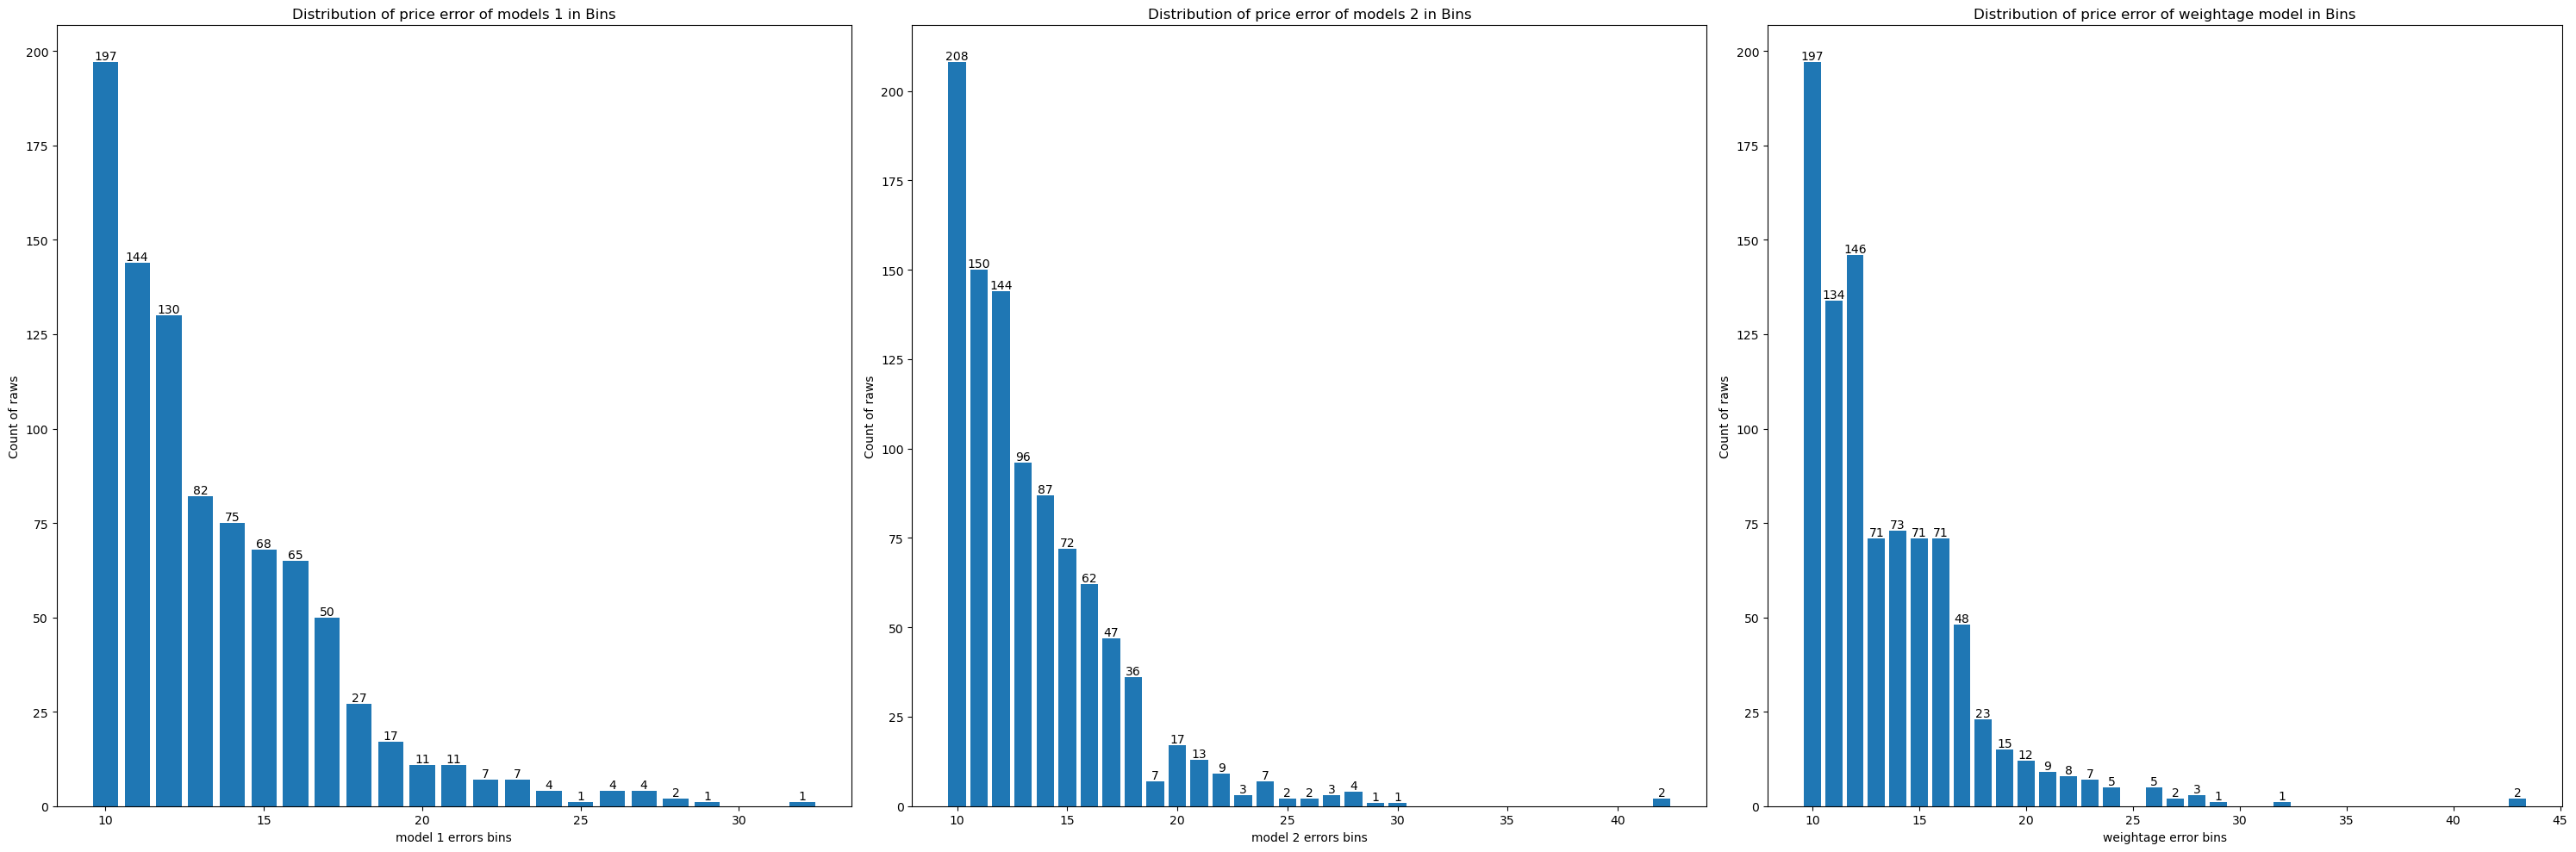

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Plot the first bar chart
bin_counts1 = results.groupby('model_1_error_bin').size()
axs[0].bar(bin_counts1.index[10:], bin_counts1.values[10:],label='model 1 error')
axs[0].set_xlabel('model 1 errors bins')
axs[0].set_ylabel('Count of raws')
axs[0].set_title('Distribution of price error of models 1 in Bins')

# Add data labels to the first bar plot
for i, count in enumerate(bin_counts1.values[10:]):
    axs[0].text(bin_counts1[10:].index[i], count, str(count), ha='center', va='bottom')


# Plot the second bar chart
bin_counts2 = results.groupby('model_2_error_bin').size()
axs[1].bar(bin_counts2.index[10:], bin_counts2.values[10:])
axs[1].set_xlabel('model 2 errors bins')
axs[1].set_ylabel('Count of raws')
axs[1].set_title('Distribution of price error of models 2 in Bins')

# Add data labels to the second bar plot
for i, count in enumerate(bin_counts2.values[10:]):
    axs[1].text(bin_counts2[10:].index[i], count, str(count), ha='center', va='bottom')


# Plot the third bar chart
bin_counts3 = results.groupby('weightage_error_bin').size()
axs[2].bar(bin_counts3.index[10:], bin_counts3.values[10:])
axs[2].set_xlabel('weightage error bins')
axs[2].set_ylabel('Count of raws')
axs[2].set_title('Distribution of price error of weightage model in Bins')

# Add data labels to the third bar plot
for i, count in enumerate(bin_counts3.values[10:]):
    axs[2].text(bin_counts3[10:].index[i], count, str(count), ha='center', va='bottom')


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
